# Shallow Examples

## $\sigma$ Known, Population Normal, Low Sample Size

_Let X equal the length of life of a 60-watt light bulb marketed by a certain manufacturer. Assume that the distribution of X is $N(\mu, 1296)$. If a random sample of n = 27 bulbs is tested until they burn out, yielding a sample mean of x = 1478 hours, find 95\% confidence interval for $\mu$_. 

**Solution:**  


Given  
$\sigma^2 = 1296 \therefore \sigma = 36$,  
$x = 1478$, $1-\alpha = 0.95$,  
$z_{\frac{\alpha}{2}} = z_{0.025} = 1.96$, $n = 27 \geq 5$  

Though sample size is $< 30$, the population distribution is given as normal already. Thus, our sampling distribution would still be a normal distribution as below with 95% confidence interval area. 

In [19]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


In [20]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

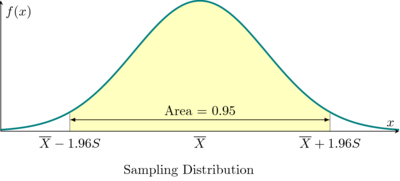

In [21]:
%%tikz -p pgfplots -x $preamble
% had to be this size to have a normal size in latex 
    \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$x$,
        ylabel=$f(x)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(1,\mean,\sd)}
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueA) (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $0.95$} (axis cs:\cihigh, 0);   

    \node[below] at (axis cs:\cilow, 0)  {$\overline{X} - 1.96S$}; 
    \node[below] at (axis cs:\mean, 0)  {$\overline{X}$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\overline{X} + 1.96S$}; 
    
    \node[below=0.75cm,text width=4cm] at (axis cs:\mean, 0){Sampling Distribution};
    
\end{axis}


We already know, in this sampling distribution, the mean $\overline{X} \to \mu$ and SD $S \to \dfrac{\sigma}{\sqrt{n}}$. Thus as we have already derived earlier, 


$$
			\begin{aligned}
            Pr\Big( {\color{blue}{\overline{X}}} - 1.96S \leq x_0 \leq {\color{blue}{\overline{X}}} + 1.96S\Big) = 1-\alpha \nonumber \\
            Pr\Big( x_0 - 1.96S \leq {\color{blue}{\overline{X}}} \leq x_0 + 1.96S\Big) = 1-\alpha \nonumber \\            
			Pr\Big( x_0 - 1.96\frac{\sigma}{\sqrt{n}} \leq {\color{blue}{\mu}} \leq x_0 + 1.96\frac{\sigma}{\sqrt{n}}\Big) = 1-\alpha \nonumber \\
			\implies Pr\Big( 1478 - 1.96\frac{36}{\sqrt{27}} \leq \mu \leq 1478 + 1.96\frac{36}{\sqrt{27}}\Big) = 0.95 \nonumber \\
			Pr\Big( 1478 - 13.58 \leq \mu \leq 1478 + 13.58\Big) = 0.95 \nonumber \\
			Pr\Big( 1464.42 \leq \mu \leq 1491.58\Big) = 0.95 \nonumber \\
			\end{aligned}
$$

Thus the 95% CI intervals are $[1464.42,1491.58]$. This does not mean, $\mu$ is inside this interval 95% of the time. But simply, if we are to take many such samples and their CIs, 95% of those CIs would contain $\mu$. We do not know what those CIs would be because we do not know the real $\mu$. 

## $\sigma$ Known, Population not Normal, High Sample Size

_The operations manager of a large production plant would like to estimate the mean amount of time a worker takes to assemble a new electronic component. Assume that the standard deviation of this assembly time is 3.6 minutes. After observing 120 workers assembling similar devices, the manager noticed that their
average time was 16.2 minutes. Construct a 92% confidence interval for the mean assembly
time_.  

**[Solution](https://www.utdallas.edu/~mbaron/3341/Practice12.pdf):** 

Given $n = 120$ which is $> 30$. The measurement in population is _mean amount of time_ which is _continuous_. Due to CLT, the resulting sampling distribution of sample means from all sample sets of size $n=120$ would result in a normal continuous distribution. Since population distribution is not normal (at least not given specifically), we could expect our confidence interval to be **approximate** only. Population SD $\sigma$ is given as known which is 3.6 minutes. The sample mean of sample set is 16.2 minutes, thus $x = 16.2$

Summarizing,  

$x = 16.2, n = 120, \sigma = 3.6$  
$1 - \alpha = 0.92, \alpha = 0.08, \dfrac{\alpha}{2} = 0.04$  

Since resulting sampling distribution is normal,we could use Z distribution. Remember, we use right tailed Z table here. 


Using [this](http://www2.stat.duke.edu/~rcs46/lectures_2015/14-bayes1/z-table.pdf) table, we get

$$
z_\frac{\alpha}{2} = z_{0.04} = 1.75
$$

$$
\begin{aligned}
			Pr\Big( x - z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}} \leq \mu \leq x + z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{n}}\Big) \approx 1-\alpha \nonumber \\
            Pr\Big( 16.2 - 1.75\frac{3.6}{\sqrt{120}} \leq \mu \leq 16.2 + 1.75\frac{3.6}{\sqrt{120}}\Big) \approx 0.92 \nonumber \\
            Pr\Big( 16.2 - 0.575 \leq \mu \leq 16.2 + 0.575\Big) \approx 0.92 \nonumber \\
            Pr\Big( 15.625 \leq \mu \leq 16.775\Big) \approx 0.92 \nonumber \\
\end{aligned}
$$  

Thus the 92% confidence intervals for given sample set is \[15.625,16.775\]

## $\sigma$ Unknown, Population Normal, Low Sample Size

To assess the accuracy of a laboratory scale, a standard weight that is known to weigh 1 gram is repeatedly weighed 4 times. The resulting measurements (in grams) are: 0.95, 1.02, 1.01, 0.98. Assume that the weighings by the scale when the true weight is 1 gram are normally distributed with mean $\mu$. Use these data to compute a 95% confidence interval for $\mu$

**[Solution](https://www.utdallas.edu/~mbaron/3341/Practice12.pdf):**  

The population is given as normally distributed with $\sigma$ unknown. Due to low sample size $n=4 < 30$, the resultant sampling distribution would be of student's _t_ distribution, than normal, so we need to use that.  

Parameters of the sample set:  

In [22]:
x = [0.95, 1.02, 1.01, 0.98]

def get_metrics(x):
    from math import sqrt
    n = len(x) # sample size
    x_bar = sum(x)/n  # unbiased sample mean
    var = sum( [(x_i - x_bar)**2 for x_i in x] )/(n-1) 
    s = round(sqrt(var),3) # unbiased sample SD
    return n, x_bar, var, s

n,x_bar,_,s = get_metrics(x)
print('n:{}  x_bar:{}  s:{}'.format(n,x_bar,s))

n:4  x_bar:0.99  s:0.032


Summarizing,

$n = 4, \ x = 0.99, \ s = 0.032, \ 1-\alpha = 0.95$

$t_{\frac{\alpha}{2},(n-1)} = t_{\frac{0.05}{2},3} = t_{0.025,3}$

Using [right tailed t table](http://pages.stat.wisc.edu/~ifischer/Intro_Stat/Lecture_Notes/APPENDIX/A5._Statistical_Tables/A5.2_-_t-distribution.pdf), $t_{0.025,3} = 3.182$

If we continued taking sample sets of this size $n=4$, we would end up getting a sampling distribution that has student's t distribution as below. 

In [23]:
preamble='''
    \pgfmathdeclarefunction{gamma}{1}{%
        \pgfmathparse{2.506628274631*sqrt(1/#1)+ 0.20888568*(1/#1)^(1.5)+ 0.00870357*(1/#1)^(2.5)- (174.2106599*(1/#1)^(3.5))/25920- (715.6423511*(1/#1)^(4.5))/1244160)*exp((-ln(1/#1)-1)*#1}%
}

    \pgfmathdeclarefunction{student}{2}{%
        \pgfmathparse{gamma((#2+1)/2.)/(sqrt(#2*pi) *gamma(#2/2.)) *((1+(#1*#1)/#2)^(-(#2+1)/2.))}%
}
'''

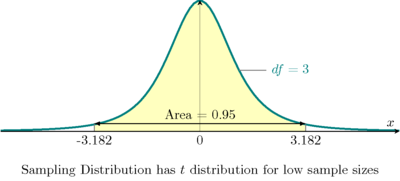

In [24]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=-6:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$x$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle,
        y axis line style={draw opacity=0.25}
]
    \def\mean{0}
    \def\sd{1}
    \def\df{3}
    \def\cilow{-3.182}
    \def\cihigh{3.182}
    
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {student(x, \df)} \closedcycle;
    \addplot [very thick,cyan!50!black] {student(x, \df)} node [pos=0.6, anchor=mid west, xshift=2em, append after command={(\tikzlastnode.west) edge [thin, gray] +(-2em,0)}] {$df=3$};;

    %https://tex.stackexchange.com/questions/453059/pgfmathsetmacro-creates-dimensions-too-large-for-t-distribution/453062
    \addplot [ycomb, gray, no markers, samples at={\cilow, \cihigh}] {student(x, \df)};
    \draw [yshift=0.2cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $0.95$} (axis cs:\cihigh, 0);
    
    \node[below] at (axis cs:\cilow, 0)  {\cilow}; 
    \node[below] at (axis cs:\mean, 0)  {0}; 
    \node[below] at (axis cs:\cihigh, 0)  {\cihigh};  
    
    
    \node[below=0.75cm,align=center, text width=10cm] at (axis cs:\mean, 0){Sampling Distribution has $t$ distribution for low sample sizes};
    
\end{axis}

$$
\begin{aligned}
	Pr\Big( x - t_{\frac{\alpha}{2},(n-1)}\frac{s}{\sqrt{n}} \leq \mu \leq x + t_{\frac{\alpha}{2},(n-1)}\frac{s}{\sqrt{n}}\Big) = 1-\alpha \nonumber \\
    Pr\Big( 0.99 - t_{(0.025,3)}\frac{0.032}{\sqrt{4}} \leq \mu \leq 0.99 + t_{(0.025,3)}\frac{0.032}{\sqrt{4}}\Big) = 0.95 \nonumber \\
    Pr\Big( 0.99 - 3.182\frac{0.032}{\sqrt{4}} \leq \mu \leq 0.99 + 3.182\frac{0.032}{\sqrt{4}}\Big) = 0.95
\end{aligned} \nonumber \\
$$

In [25]:
def get_CI(x_bar, zrt, s, n):
    from math import sqrt
    m = zrt*(s/(sqrt(n)))
    return [x_bar-m,x_bar+m]

t = 3.182
print(get_CI(x_bar, t, s, n))

[0.939088, 1.040912]


$\therefore$ the 95% CI in our case are, 
$$
\begin{aligned}
Pr\Big( 0.94 \leq \mu \leq 1.04\Big) = 0.95 \nonumber \\
\end{aligned}
$$

## $\sigma$ Unknown, Population not Normal, High Sample Size

_In order to ensure efficient usage of a server, it is necessary to estimate the mean number of concurrent users. According to records, the sample mean and sample standard deviation of number of concurrent users at 100 randomly selected times is 37.7 and 9.2, respectively.Construct a 90% confidence interval for the mean number of concurrent users_.

**[Solution](https://www.utdallas.edu/~mbaron/3341/Practice12.pdf)**  

The measurement at hand is mean number of concurrent users. This is a continuous random variable. Irrespective of population distribution, if sample size is large enough, due to CLT, eventually the sampling distribution formed will be normal. Here $n=100 > 30$, so we would at least approximately could get good enough CI with 90% confidence level as asked.  

Summarizing,

$n=100, \ x = 37.7, \ s = 9.2$  
$1 - \alpha = 0.9, \ \alpha=0.1, \ \frac{\alpha}{2} = 0.05$  
This time, we shall use code to find the right tailed z area,..

In [26]:
def get_z(cl):
    from scipy import stats
    alpha = round((1 - cl)/2,3)
    return (-1)*(round(stats.norm.ppf(alpha),3))  # right tailing..

print(get_z(0.90))

1.645


Thus, 
$z_{0.05} = 1.645$

$$
\begin{aligned}
    Pr\Big( x - z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}} \leq \mu \leq x + z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}\Big) \approx 1-\alpha \nonumber \\
    Pr\Big( 37.7 - z_{0.05}\frac{9.2}{\sqrt{100}} \leq \mu \leq 37.7 + z_{0.05}\frac{9.2}{\sqrt{100}}\Big) \approx 0.9 \nonumber \\
    Pr\Big( 37.7 - 1.645\frac{9.2}{\sqrt{100}} \leq \mu \leq 37.7 + 1.645\frac{9.2}{\sqrt{100}}\Big) \approx 0.9 
\end{aligned}
$$

In [27]:
x, z, s, n = 37.7, 1.645, 9.2, 100
print(get_CI(x, z, s, n))

[36.186600000000006, 39.2134]


Thus the desired 90\% CI intervals are \[36.2,39.2\]

Note: Since the sample size is high, even if $t$ distribution is used, result would be almost same, because at such high sample sizes, $t$ distribution would be almost identical to $z$ distribution. 

## Difference between two means, Welch's 't' interval

_The species, the deinopis and menneus, coexist in eastern Australia. The following summary statistics were obtained on the size, in millimeters, of the prey of the two species. Calculate the 95% confidence interval for the difference in their means. _


|Adult Dinopis|Adult Menneus
|--|--|
|n=10|m=10|
|$\overline{x}=10.26 mm$|$\overline{y}=9.02 mm$|
|$s^2_x = (2.51)^2$|$s^2_y = (1.90)^2$|

**[Solution](https://onlinecourses.science.psu.edu/stat414/node/203/)**  

**Given:**  
Let  $\overline{X} = N(\mu_{\overline{x}},\sigma_{\overline{x}}^2)$ be the random variable of sampling distribution for Adult Dinopis. And so is  $\overline{Y} = N(\mu_{\overline{y}},\sigma_{\overline{y}}^2)$ for Adult Menneus. Then we are given one sample set data frame from each species. 

$\overline{x}_{1} = 10.26 mm, \ \ s_{\overline{x}}=2.51\ mm, \ \ n = 10$  
$\overline{y}_{1} = 9.02 mm, \ \ s_{\overline{y}}=1.90\ mm, \ \ m = 10$  
$1-\alpha = 0.95, \alpha = 0.05, \frac{\alpha}{2} = 0.025$

**Approach:**  
Note the $\sigma_{x},\sigma_{y}$ are unknown. Also both $n,m$ are small $n < 30, m < 30$. It is totally not needed that $n=m$, but in this case we have that. 

$$
    \begin{aligned}
        Pr\Big(  (\overline{X} - \overline{Y}) - t_{(\frac{\alpha}{2},r)}s_w \leq (\mu_{\overline{x}} - \mu_{\overline{y}}) \leq  	(\overline{X} - \overline{Y}) + t_{(\frac{\alpha}{2},r)}s_w\Big) \approx 1-\alpha  \nonumber		
    \end{aligned}	
$$

$$
\begin{aligned}
\overline{x}_{1} - \overline{y}_{1} = 10.26 - 9.02 \nonumber \\
s_w = \sqrt{ {\dfrac{s_{\overline{x}}^2}{n}}   +  {\dfrac{s_{\overline{y}}^2}{m}}} = 
\sqrt{ {\dfrac{{2.51}^2}{10}}   +  {\dfrac{{1.90}^2}{10}}  } \nonumber \\
r = \dfrac{  \Big(  \dfrac{s_x^2}{n} + \dfrac{s_y^2}{m}   \Big)^2  }{ \dfrac{1}{n-1}\Big(\dfrac{s_x^2}{n}\Big)^2 + \dfrac{1}{m-1}\Big(\dfrac{s_y^2}{m}\Big)^2  } = 
\dfrac{  \Big(  \dfrac{{2.51}^2}{10} + \dfrac{{1.90}^2}{10}   \Big)^2  }{ \dfrac{1}{9}\Big(\dfrac{{2.51}^2}{10}\Big)^2 + \dfrac{1}{9}\Big(\dfrac{{1.90}^2}{10}\Big)^2  }
\end{aligned}
$$  

In [28]:
x_1, y_1, s_xbar, s_ybar, n, m = 10.26, 9.02, 2.51, 1.90, 10, 10

w_1 = round(x_1 - y_1,3)

def get_s_w(s_x, s_y,n,m):
    v_x, v_y = (s_x**2)/n, (s_y**2)/m
    from math import sqrt
    return round(sqrt(v_x + v_y),4)
    
s_w = get_s_w(s_xbar, s_ybar, n, m)

def get_r(s_x, s_y,n,m):
    v_x, v_y = (s_x**2)/n, (s_y**2)/m
    num = (v_x + v_y)**2
    den_1 = (1/(n-1))*((v_x)**2)
    den_2 = (1/(m-1))*((v_y)**2)
    r = num / (den_1 + den_2)
    from math import modf
    return modf(r)[1]

r = get_r(s_xbar, s_ybar, n, m)

print('x_bar - y_bar:{}, s_w:{}, r:{}'.format(w_1, s_w, r))

# calculate t value
cl = 0.95
half_alpha = round((1 - cl)/2,3)
from scipy import stats
t = round(stats.t.ppf(1-half_alpha, r),3)

print('t:' + str(t))

x_bar - y_bar:1.24, s_w:0.9955, r:16.0
t:2.12


$$
    \begin{aligned}
        Pr\Big(  (\overline{X} - \overline{Y}) - t_{(\frac{\alpha}{2},r)}s_w \leq (\mu_{\overline{x}} - \mu_{\overline{y}}) \leq  	(\overline{X} - \overline{Y}) + t_{(\frac{\alpha}{2},r)}s_w\Big) \approx 1-\alpha  \nonumber \\    
        Pr\Big(  1.24 - (2.12)(0.9955) \leq (\mu_{\overline{x}} - \mu_{\overline{y}}) \leq  	1.24 + (2.12)(0.9955)\Big) \approx 0.95  \nonumber \\    
    \end{aligned}	
$$

In [29]:
cilow, cihigh = round((w_1 - t*s_w),4),round((w_1 + t*s_w),4)
print(cilow, cihigh)

-0.8705 3.3505


$$
    \begin{aligned}
        Pr( -0.87 \leq (\mu_{\overline{x}} - \mu_{\overline{y}}) \leq  	3.35) \approx 0.95  \nonumber \\    
    \end{aligned}	
$$

Thus the 95% confidence intervals for the difference of sample means of given problem is $(-0.87, 3.35)

## Difference between two proportions

_Duncan is investigating if residents of a city support the construction of a new high school. He's curious about the difference of opinion between residents in the North and South parts of the city. He obtained separate random samples of voters from each region. Here are the results:_

|Supports Construction?|North|South|
|---|---|---|
|Yes|54|77|
|No|66|63|
|Total|120|140|

_Duncan wants to use these results to construct a 90\% confidence interval to estimate the difference in the proportion of residents in these regions who support the construction project $(p_S-p_N)$. Assume that all of the conditions for inference have been met. Calculate 90\% confidence interval based on Duncan's samples_

**[Solution](https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-z-interval-proportions/v/calculating-two-sample-z-interval-confidence-interval-for-difference-of-proportions):**  

Conveniently the sample sizes are high, so we could assume normal approximations for sampling distributions of sample proportions for both North and South parts of the city. 

**Given:**  
Let $\dfrac{Y_S}{n_S} = N\Big(p_1, \dfrac{p_1q_1}{n_1}\Big)$ represent sampling distribution for South. Similarly, $\dfrac{Y_N}{n_N} = N\Big(p_2, \dfrac{p_2q_2}{n_2}\Big)$ for North. 

We have the test statistic as follows.  
$\hat{p_S} = \dfrac{y_S}{n_S} = \dfrac{77}{140}, \hat{q_S} = \dfrac{y_S}{n_S} = 1 - \dfrac{77}{140}$  
$\hat{p_N} = \dfrac{y_N}{n_N} = \dfrac{54}{120}, \hat{q_N} = 1 - \dfrac{y_N}{n_N} =  1 - \dfrac{54}{120}$  
$1 - \alpha = 0.90, \alpha = 0.1, \dfrac{\alpha}{2} = 0.05$  

In [12]:
t_s = [77/140, 1-(77/140), 54/120, 1-(54/120)]
t_s = ['%0.3f' % e for e in t_s]
t_s = [float(i) for i in t_s]
[p_s, q_s, p_n, q_n] = t_s
print(p_s, q_s, p_n, q_n)

0.55 0.45 0.45 0.55


$\therefore \hat{p_S} = 0.55,\hat{q_S} = 0.45,\hat{p_N} = 0.45,\hat{p_N} = 0.55$

$$
    \begin{aligned}
	Pr\Bigg(  -z_{\frac{\alpha}{2}} \leq \dfrac{(\hat{p_S} - \hat{p_N}) - (p_S - p_N) }{\sqrt{ {\frac{\hat{p_S}\hat{q_S}}{n_S}}   +  {\frac{\hat{p_N}{\hat{q_N}}}{n_N}}  }} \leq  	z_{\frac{\alpha}{2}}\Bigg) \approx 1-\alpha = 0.90  \nonumber
	\end{aligned}  
$$

In [16]:
diff = round(p_s - p_n,3)

n_s, n_n = 140,120
from math import sqrt
w_sd = round(sqrt((p_s*q_s/n_s) + (p_n*q_n/n_n)),3)


# get Z 
cl = 0.90
from scipy import stats
alpha = 1 - cl
z = (-1)*round(stats.norm.ppf(alpha/2),3)

print(diff, w_sd, z)

0.1 0.062 1.645


Substituting, we get, 

$$
    \begin{aligned}
	Pr\Big(  -1.645 \leq \dfrac{0.1 - (p_S - p_N) }{0.062} \leq  1.645 \Big) \approx 0.90  \nonumber \\
    Pr\Big(  (-1.645)0.062 \leq 0.1 - (p_S - p_N) \leq  (1.645)0.062 \Big) \approx 0.90 \nonumber \\
    Pr\Big(  0.1 - (1.645)0.062 \leq (p_S - p_N) \leq  0.1 + (1.645)0.062 \Big) \approx 0.90 \nonumber \\
	\end{aligned}  
$$

In [18]:
cilow, cihigh = round(diff - z*w_sd,3), round(diff + z*w_sd,3)
print(cilow, cihigh)

-0.002 0.202


Thus the 90\% CI intervals for the difference between proportions are $(-0.002, 0.202)$. That is, 

$$
\begin{aligned}
Pr\Big(  -0.002 \leq (p_S - p_N) \leq  0.202 \Big) \approx 0.90 \nonumber 
\end{aligned}
$$

# Useful Snippets

## Python

**Get t score**

Could be useful, when you have significance level $\alpha$ and degrees of freedom $df = n-1$, and have to calculate corresponding t score

In [30]:
def get_t(cl, n):
    from scipy import stats
    half_alpha = round((1 - cl)/2,3)
    return round(stats.t.ppf(1-half_alpha, n-1),3)
    
cl = 0.95  # confidence level
n = 4      # sample size
print(get_t(cl, n))

3.182


**Get Z score**

Could be useful, when you have significance level $\alpha$ and have to calculate corresponding Z score. Remember to always check if you need left tailed area or right tailed.

In [31]:
def get_z(cl):
    #NOTE:returns right tailed area as that is mostly used in CI
    from scipy import stats
    alpha = round((1 - cl)/2,3)
    return (-1)*round(stats.norm.ppf(alpha),3)  # right tailing..

cl = 0.95
print(get_z(cl))

1.96


**Z and T distribution**

Plotting a z and t distribution. 

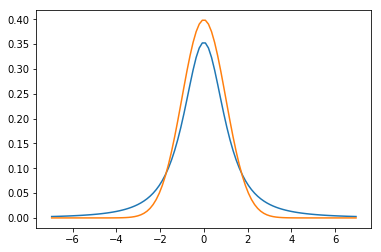

In [32]:
%matplotlib inline
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt

n = 3
df = n-1
fig,ax = plt.subplots(1,1)
x = np.linspace(t.ppf(0.01,df), t.ppf(0.99,df),100)
ax.plot(x, t.pdf(x,df), color='C0')  # blue is t distribution
ax.plot(x, norm.pdf(x), color='C1')  # red
plt.show()

## Tikz in Ipython

Some parts of this book including this section are created using ipython notebooks and thus few figures which needed to be constructed via tikz needed an extension. Below figures are created via tikz by using an ipython extension called [tikzmagic](https://github.com/mkrphys/ipython-tikzmagic), so the format is slightly different for preamble. However, for tikz users, the essence could be easily captured. 

For first time usage (or after reset and clear of notebook), always load tikz as below. 
```
%load_ext tikzmagic
```
Also note, preamble is placed in a separate code cell above, because ipython needs magic commands to start as first line in cells. Here, tikz execution needs a magic command in subsequent cell. 

**Z distribution:**

In [33]:
preamble = '''
    \pgfmathdeclarefunction{gauss}{3}{%
      \pgfmathparse{1/(#3*sqrt(2*pi))*exp(-((#1-#2)^2)/(2*#3^2))}%
    }
'''

\


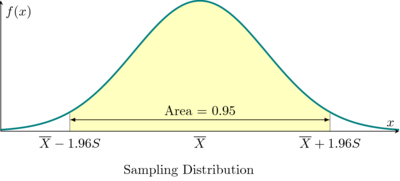

In [34]:
%%tikz -p pgfplots -x $preamble
% had to be this size to have a normal size in latex 
    \begin{axis}[
        no markers, 
        domain=0:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$x$,
        ylabel=$f(x)$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle
      ]
    
    \def\mean{3}
    \def\sd{1}
    \def\cilow{\mean - 1.96*\sd}
    \def\cihigh{\mean + 1.96*\sd}
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {gauss(x, \mean, \sd)} \closedcycle;
    \addplot [very thick,cyan!50!black] {gauss(x, 3, 1)};

    \pgfmathsetmacro\valueA{gauss(1,\mean,\sd)}
    \draw [gray] (axis cs:\cilow,0) -- (axis cs:\cilow,\valueA) (axis cs:\cihigh,0) -- (axis cs:\cihigh,\valueA);
    \draw [yshift=0.3cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $0.95$} (axis cs:\cihigh, 0);   

    \node[below] at (axis cs:\cilow, 0)  {$\overline{X} - 1.96S$}; 
    \node[below] at (axis cs:\mean, 0)  {$\overline{X}$}; 
    \node[below] at (axis cs:\cihigh, 0)  {$\overline{X} + 1.96S$}; 
    
    \node[below=0.75cm,text width=4cm] at (axis cs:\mean, 0){Sampling Distribution};
    
\end{axis}

**$t$ distribution**:  

In [35]:
preamble='''
    \pgfmathdeclarefunction{gamma}{1}{%
        \pgfmathparse{2.506628274631*sqrt(1/#1)+ 0.20888568*(1/#1)^(1.5)+ 0.00870357*(1/#1)^(2.5)- (174.2106599*(1/#1)^(3.5))/25920- (715.6423511*(1/#1)^(4.5))/1244160)*exp((-ln(1/#1)-1)*#1}%
}

    \pgfmathdeclarefunction{student}{2}{%
        \pgfmathparse{gamma((#2+1)/2.)/(sqrt(#2*pi) *gamma(#2/2.)) *((1+(#1*#1)/#2)^(-(#2+1)/2.))}%
}
'''

\ 


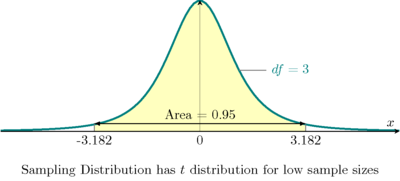

In [36]:
%%tikz -p pgfplots -x $preamble
\begin{axis}[
        no markers, 
        domain=-6:6, 
        samples=100,
        ymin=0,
        axis lines*=left, 
        xlabel=$x$,
        height=5cm, 
        width=12cm,
        xtick=\empty, 
        ytick=\empty,
        enlargelimits=false, 
        clip=false, 
        axis on top,
        grid = major,
        axis lines = middle,
        y axis line style={draw opacity=0.25}
]
    \def\mean{0}
    \def\sd{1}
    \def\df{3}
    \def\cilow{-3.182}
    \def\cihigh{3.182}
    
    \addplot [draw=none, fill=yellow!25, domain=\cilow:\cihigh] {student(x, \df)} \closedcycle;
    \addplot [very thick,cyan!50!black] {student(x, \df)} node [pos=0.6, anchor=mid west, xshift=2em, append after command={(\tikzlastnode.west) edge [thin, gray] +(-2em,0)}] {$df=3$};;

    %https://tex.stackexchange.com/questions/453059/pgfmathsetmacro-creates-dimensions-too-large-for-t-distribution/453062
    \addplot [ycomb, gray, no markers, samples at={\cilow, \cihigh}] {student(x, \df)};
    \draw [yshift=0.2cm, latex-latex](axis cs:\cilow, 0) -- node [above] {Area = $0.95$} (axis cs:\cihigh, 0);
    
    \node[below] at (axis cs:\cilow, 0)  {\cilow}; 
    \node[below] at (axis cs:\mean, 0)  {0}; 
    \node[below] at (axis cs:\cihigh, 0)  {\cihigh};  
    
    
    \node[below=0.75cm,align=center, text width=10cm] at (axis cs:\mean, 0){Sampling Distribution has $t$ distribution for low sample sizes};
    
\end{axis}